<a href="https://colab.research.google.com/github/amansin05/Water-Quality-Prediction-Model/blob/main/Water_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/ML_PROJECT/water_potability (1).csv')

In [5]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# **Exploratory Data Analysis**

In [6]:
data.shape  # Rows,Columns

(3276, 10)

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [10]:
data = data.fillna(data.mean()) #Replacing null values by its mean

## Checking if we need to do dimensionality Reduction

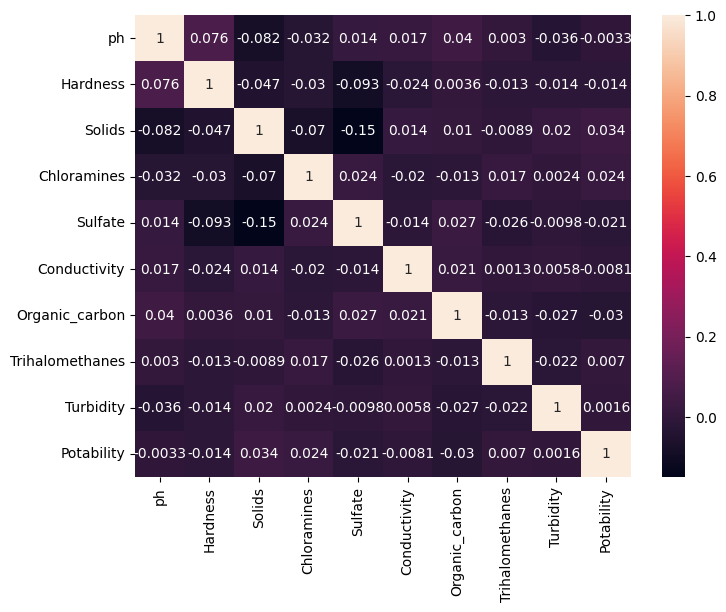

In [11]:
 sns.heatmap(data.corr(),annot = True)
 fig=plt.gcf()
 fig.set_size_inches(8,6)
 plt.show()

### **Checking Outlier using Boxplot**

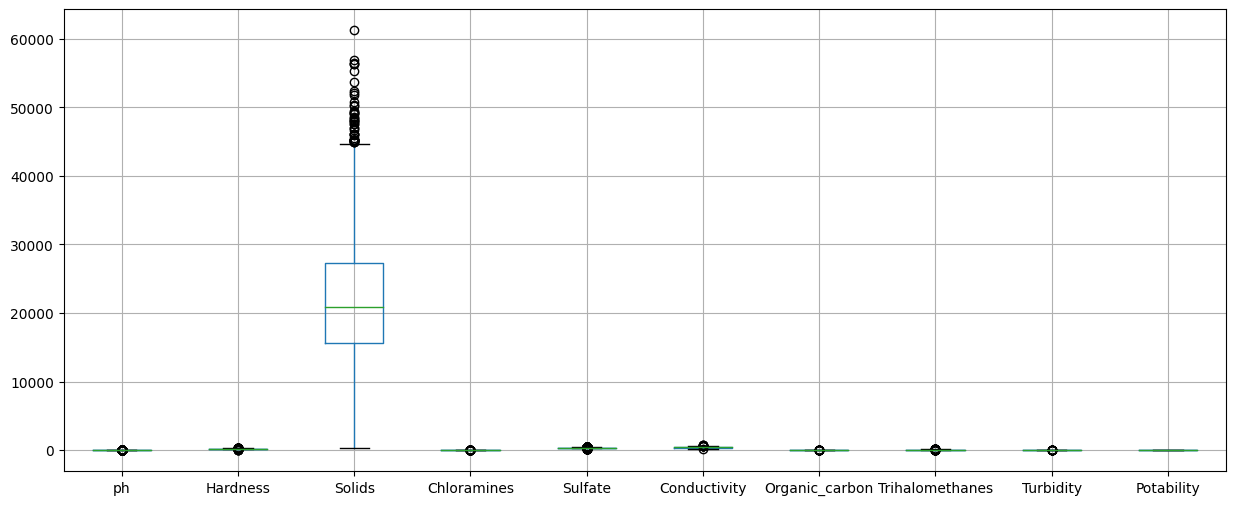

In [12]:
data.boxplot(figsize=(15,6))
plt.show()

In [13]:
data['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690300
50%      20927.833605
75%      27332.762125
max      61227.196010
Name: Solids, dtype: float64

In [14]:
#Not removing the Outliers bcoz they may be important to decide the quality of water

In [15]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

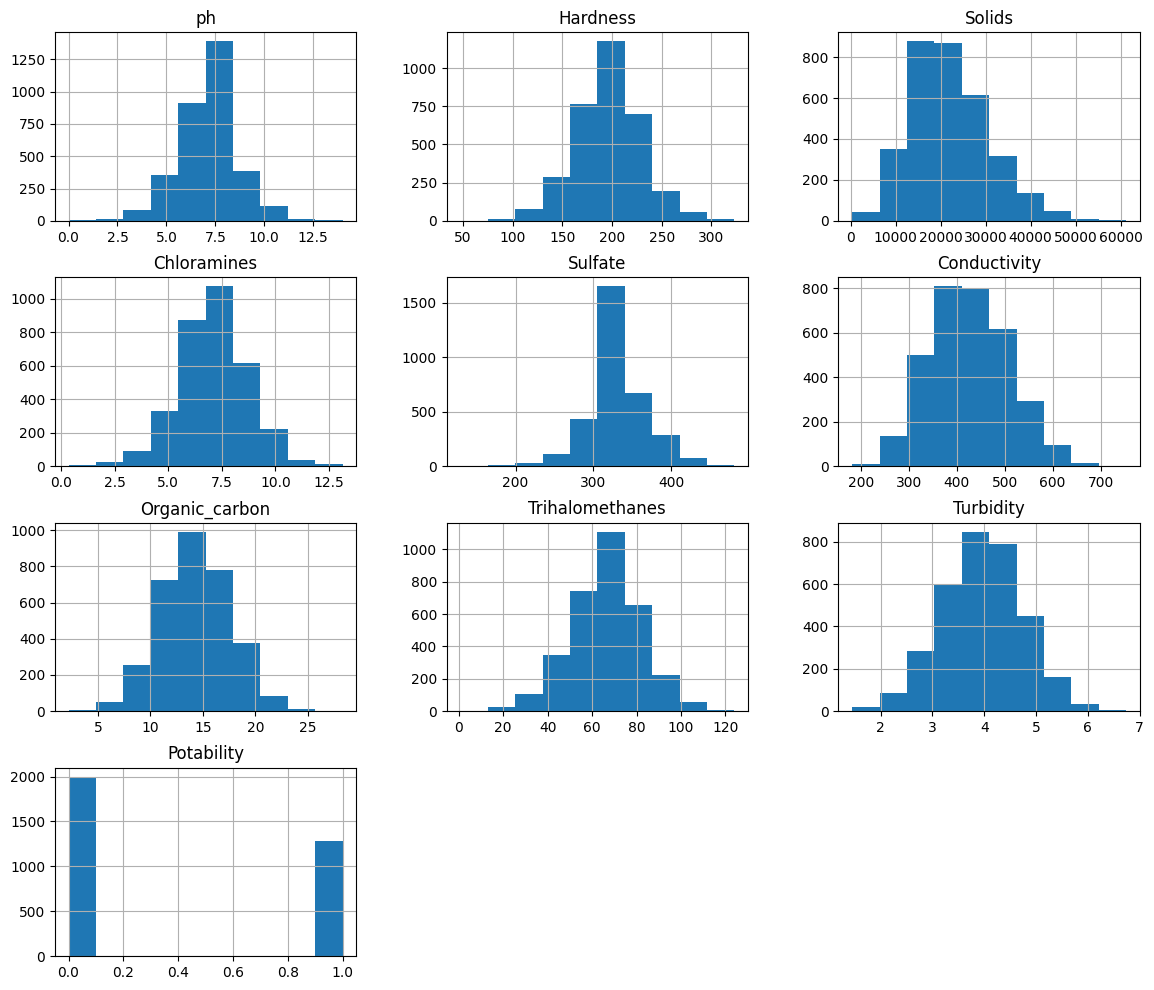

In [16]:
data.hist(figsize=(14,12))
plt.show()

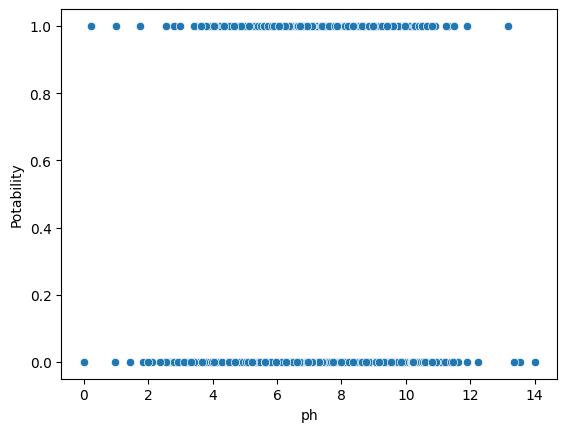

In [17]:
sns.scatterplot(x=data['ph'],y=data['Potability'])
plt.show()

###Partitioning

In [18]:
X=data.drop('Potability',axis=1) #Input Data

In [19]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.80216,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.57822,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.86938,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [20]:
y=data['Potability'] #Target Variable

In [21]:
# from sklearn.model_selection import train_test_split

In [22]:
# X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state= 100)
# X_train

# **Model Training**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =2)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [26]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [27]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [28]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [29]:
train_classifier(svc,X_train,y_train,X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.6295731707317073, 0.0)

In [30]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.6295731707317073
Precision -  0.0
For  KN
Accuracy -  0.5579268292682927
Precision -  0.38071065989847713
For  NB
Accuracy -  0.524390243902439
Precision -  0.3904761904761905
For  DT
Accuracy -  0.6539634146341463
Precision -  0.58
For  LR
Accuracy -  0.6295731707317073
Precision -  0.0
For  RF
Accuracy -  0.6875
Precision -  0.6338028169014085
For  AdaBoost
Accuracy -  0.614329268292683
Precision -  0.45689655172413796
For  BgC
Accuracy -  0.6966463414634146
Precision -  0.6428571428571429
For  ETC
Accuracy -  0.6844512195121951
Precision -  0.6343283582089553
For  GBDT
Accuracy -  0.6661585365853658
Precision -  0.6395348837209303
For  xgb
Accuracy -  0.663109756097561
Precision -  0.5585106382978723


In [31]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending = False)

In [32]:
performance_df

,Algorithm,Accuracy,Precision
7,BgC,0.696646,0.642857
9,GBDT,0.666159,0.639535
8,ETC,0.684451,0.634328
5,RF,0.687500,0.633803
3,DT,0.653963,0.580000
10,xgb,0.663110,0.558511
6,AdaBoost,0.614329,0.456897
2,NB,0.524390,0.390476
1,KN,0.557927,0.380711
0,SVC,0.629573,0.000000


In [33]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [34]:
performance_df1

,Algorithm,variable,value
0,BgC,Accuracy,0.696646
1,GBDT,Accuracy,0.666159
2,ETC,Accuracy,0.684451
3,RF,Accuracy,0.687500
4,DT,Accuracy,0.653963
5,xgb,Accuracy,0.663110
6,AdaBoost,Accuracy,0.614329
7,NB,Accuracy,0.524390
8,KN,Accuracy,0.557927
9,SVC,Accuracy,0.629573


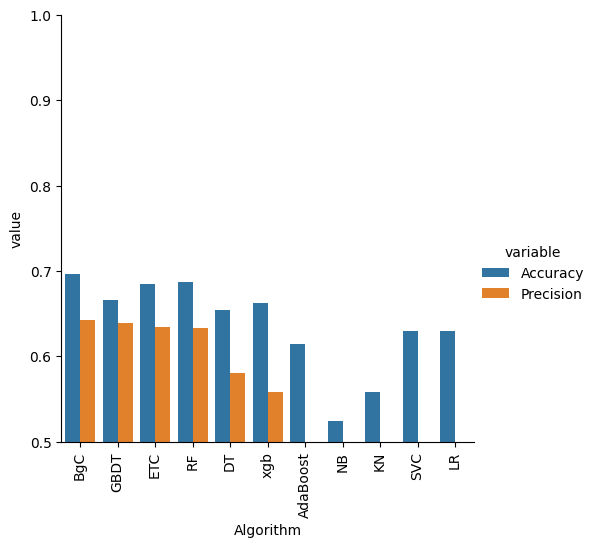

In [35]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

**Decision** **Tree**

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
dt=DecisionTreeClassifier(criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=10)

In [39]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,prediction)*100
accuracy_dt

61.12804878048781

In [41]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 0.923
Accuracy on test set: 0.611


In [42]:
accuracy_score(prediction,y_test)

0.6112804878048781

In [43]:
print("Feature importances:\n{}".format(dt.feature_importances_))

Feature importances:
[0.1215589  0.11898754 0.11049768 0.11376022 0.12836161 0.08577979
 0.12369848 0.09370386 0.10365192]


In [45]:
confusion_matrix(prediction,y_test)

array([[297, 139],
       [116, 104]])

Prediction on only one set of data

In [53]:
X_DT=dt.predict([[4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821	]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [54]:
X_DT

array([1])

**KNN**

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(metric='manhattan', n_neighbors=22)
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=22)

In [56]:

prediction_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100
print('accuracy_score score     : ',accuracy_score(y_test,prediction_knn)*100,'%')

accuracy_score score     :  61.4329268292683 %


In [57]:
confusion_matrix(prediction,y_test)

array([[297, 139],
       [116, 104]])

# **Hyperparameter Tuning / Model Optimization**

## **DT HPT**

In [58]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [61]:
#example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = DecisionTreeClassifier()
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
min_samples_split = [2,4,6,8,10]

# define grid search
grid = dict(splitter=splitter, criterion=criterion, min_samples_split=min_samples_split)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_dt = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,
                           scoring='accuracy',error_score=0)
grid_search_dt.fit(X_train, y_train)

# summarize results
print(f"Best: {grid_search_dt.best_score_:.3f} using {grid_search_dt.best_params_}")
means = grid_search_dt.cv_results_['mean_test_score']
stds = grid_search_dt.cv_results_['std_test_score']
params = grid_search_dt.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

print("Training Score:",grid_search_dt.score(X_train, y_train)*100)
print("Testing Score:", grid_search_dt.score(X_test, y_test)*100)

Best: 0.590 using {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'random'}
0.577 (0.028) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'best'}
0.576 (0.034) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'random'}
0.578 (0.024) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'best'}
0.580 (0.032) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'random'}
0.580 (0.027) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'best'}
0.590 (0.029) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'random'}
0.581 (0.024) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'best'}
0.588 (0.030) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'random'}
0.582 (0.027) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'best'}
0.584 (0.025) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'random'}
0.585 (0.026) with: {'criterion': 'entropy

In [79]:
# from sklearn.metrics import  make_scorer
# from sklearn.model_selection import cross_val_score

# def classification_report_with_accuracy_score(Y_test, y_pred2):
#     print (classification_report(Y_test, y_pred2)) # print classification report
#     return accuracy_score(Y_test, y_pred2) # return accuracy score


# nested_score = cross_val_score(grid_search_dt, X=X_train, y=y_train, cv=cv,
#                scoring=make_scorer(classification_report_with_accuracy_score))
# print (nested_score)

In [67]:
dt_y_predicted = grid_search_dt.predict(X_test)
dt_y_predicted

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,

In [68]:
grid_search_dt.best_params_

{'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'random'}

In [70]:
dt_grid_score=accuracy_score(y_test, dt_y_predicted)
dt_grid_score

0.5945121951219512

In [72]:
confusion_matrix(y_test, dt_y_predicted)

array([[282, 131],
       [135, 108]])

## **KNN HPT**

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 31)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
grid_search_knn = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,
                           scoring='accuracy',error_score=0)
grid_search_knn.fit(X_train, y_train)

# summarize results
print(f"Best: {grid_search_knn.best_score_:.3f} using {grid_search_knn.best_params_}")
means = grid_search_knn.cv_results_['mean_test_score']
stds = grid_search_knn.cv_results_['std_test_score']
params = grid_search_knn.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Best: 0.593 using {'metric': 'euclidean', 'n_neighbors': 24, 'weights': 'uniform'}
0.539 (0.023) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.539 (0.023) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.581 (0.021) with: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.539 (0.023) with: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.545 (0.026) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.547 (0.023) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.573 (0.017) with: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.546 (0.014) with: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.547 (0.026) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.552 (0.026) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.575 (0.018) with: {'metric': 'euclidean', 'n_neighbors': 6, 'weights':

In [78]:
# from sklearn.metrics import  make_scorer
# from sklearn.model_selection import cross_val_score

# def classification_report_with_accuracy_score(Y_test, y_pred2):
#     print (classification_report(Y_test, y_pred2)) # print classification report
#     return accuracy_score(Y_test, y_pred2) # return accuracy score


# nested_score = cross_val_score(grid_search_knn, X=X_train, y=y_train, cv=cv,
#                scoring=make_scorer(classification_report_with_accuracy_score))
# print (nested_score)

In [81]:
knn_y_predicted = grid_search_knn.predict(X_test)
knn_y_predicted

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [83]:
knn_grid_score=accuracy_score(y_test, knn_y_predicted)
knn_grid_score


0.6189024390243902

In [84]:
grid_search_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 24, 'weights': 'uniform'}

In [86]:
confusion_matrix(y_test, knn_y_predicted)

array([[372,  41],
       [209,  34]])

Prediction on only one set of data

In [92]:
X_KNN=knn.predict([[7.874671,195.102299,17404.17706,7.509306,333.775777,327.459761,16.140368,78.698446,2.309149]])
X_KNN

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])